In [45]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

name = 'mnist'
task = 'mnist'
run_iter = 1
repeats = 20
bo_path = f"saved_results/{name}/bo_{task}_{run_iter}.p"
bobos_path = f"saved_results/{name}/bobos_{task}_{run_iter}.p"
bobosplus_path = f"saved_results/{name}/bobos+_{task}_{run_iter}.p"

# analyze individual runs

In [46]:
bo = pickle.load(open(bo_path, "rb"))
bobos = pickle.load(open(bobos_path, "rb"))
bobosplus = pickle.load(open(bobosplus_path, "rb"))

epoch_values = bo["all"]["epoch_values"]
conc_epoch_values = [e for epoch in epoch_values for e in epoch]
conc_epoch_values_cum_bo = 1.0 - np.maximum.accumulate(conc_epoch_values)
print(len(conc_epoch_values_cum_bo))

epoch_values = bobos["all"]["epoch_values"]
conc_epoch_values = [e for epoch in epoch_values for e in epoch]
conc_epoch_values_cum_bobos = 1.0 - np.maximum.accumulate(conc_epoch_values)
print(len(conc_epoch_values_cum_bobos))

epoch_values = bobosplus["all"]["epoch_values"]
conc_epoch_values = [e for epoch in epoch_values for e in epoch]
conc_epoch_values_cum_bobosplus = 1.0 - np.maximum.accumulate(conc_epoch_values)
print(len(conc_epoch_values_cum_bobosplus))


2650
2024
1196


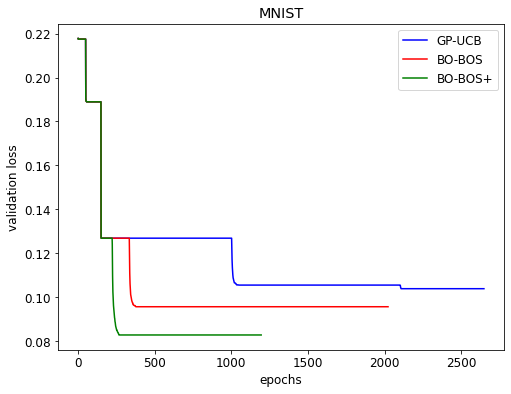

In [47]:

plt.rc('font', family='sans-serif', size=12)
plt.figure(figsize=(8, 6))
plt.plot(conc_epoch_values_cum_bo, color='b')
plt.plot(conc_epoch_values_cum_bobos, color='r')
plt.plot(conc_epoch_values_cum_bobosplus, color='g')
plt.title("MNIST")
plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.legend(("GP-UCB", "BO-BOS", "BO-BOS+"))
axes = plt.gca()
# axes.set_ylim([0.07, 0.1])
plt.show()



# analyze runs


<font size="4">Each log file (represented by "result" below) is a dictionary, with the following key elements: </font> <br> <br>
**results["all"]["epoch_values"]**: this is a list, whose length is equal to the total number of BO iterations; each element of the list is another list corresponding to a particular iteration, which contains the validation accuracy after each training epoch in this particular iteration. <br> <br>
**results["all"]["eval_times"]**: this item has exactly the same shape as "epoch values", with each element representing the time at which the corresponding epoch value is obtained. <br> <br>
**results["all"]["time_started"]**: the starting time of the script, which is to be subtracted from each element of the "eval_times" to calculate the run time of the script. <br> <br>
**results["all"]["params"]**: this is a list whose length is equal to the number of BO iterations; each element of the list represents the the value of the hyper-parameters evaluated in the corresponding BO iteration. <br> <br>


In [48]:

min_len_bo = 1e4 # get the minimum length among all runs, for visualization
min_len_bobos = 1e4 # get the minimum length among all runs, for visualization
min_len_bobosplus = 1e4 # get the minimum length among all runs, for visualization

epoch_values_bo = []
epoch_values_bobos = []
epoch_values_bobosplus = []
for run_iter in np.arange(1, repeats+1):
    # load BO runs
    bo = pickle.load(open(f"saved_results/{name}/bo_{task}_{run_iter}.p", "rb"))
    epoch_values = bo["all"]["epoch_values"]
    conc_epoch_values = [e for epoch in epoch_values for e in epoch]
    conc_epoch_values_cum = 1.0 - np.maximum.accumulate(conc_epoch_values)

    if len(conc_epoch_values_cum) < min_len_bo:
        min_len_bo = len(conc_epoch_values_cum)
    epoch_values_bo.append(conc_epoch_values_cum)

    # load BOBOS runs
    bobos = pickle.load(open(f"saved_results/{name}/bobos_{task}_{run_iter}.p", "rb"))
    epoch_values = bobos["all"]["epoch_values"]
    conc_epoch_values = [e for epoch in epoch_values for e in epoch]
    conc_epoch_values_cum = 1.0 - np.maximum.accumulate(conc_epoch_values)
    
    if len(conc_epoch_values_cum) < min_len_bobos:
        min_len_bobos = len(conc_epoch_values_cum)
    epoch_values_bobos.append(conc_epoch_values_cum)

    # load BOBOS+ runs
    bobosplus = pickle.load(open(f"saved_results/{name}/bobos+_{task}_{run_iter}.p", "rb"))
    epoch_values = bobosplus["all"]["epoch_values"]
    conc_epoch_values = [e for epoch in epoch_values for e in epoch]
    conc_epoch_values_cum = 1.0 - np.maximum.accumulate(conc_epoch_values)
    
    if len(conc_epoch_values_cum) < min_len_bobosplus:
        min_len_bobosplus = len(conc_epoch_values_cum)
    epoch_values_bobosplus.append(conc_epoch_values_cum)


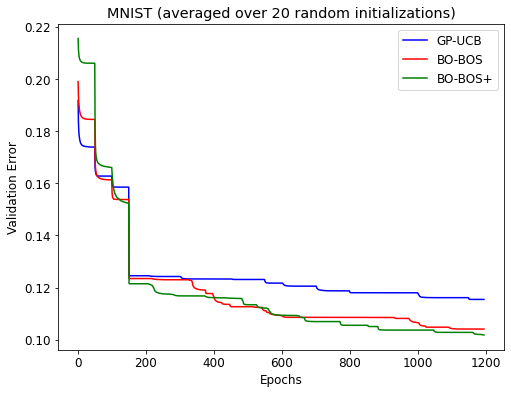

In [49]:
# TMP: Override min_len for all methods by the the smallest of them all
min_len_bo, min_len_bobos, min_len_bobosplus = min_len_bobosplus, min_len_bobosplus, min_len_bobosplus

epochs_bo_trunc = np.array([epochs[:min_len_bo] for epochs in epoch_values_bo])
epochs_bo_trunc_mean = np.mean(epochs_bo_trunc, axis=0)

epochs_bobos_trunc = np.array([epochs[:min_len_bobos] for epochs in epoch_values_bobos])
epochs_bobos_trunc_mean = np.mean(epochs_bobos_trunc, axis=0)

epochs_bobosplus_trunc = np.array([epochs[:min_len_bobosplus] for epochs in epoch_values_bobosplus])
epochs_bobosplus_trunc_mean = np.mean(epochs_bobosplus_trunc, axis=0)

plt.rc('font', family='sans-serif', size=12)
plt.figure(figsize=(8, 6))
plt.plot(epochs_bo_trunc_mean, color='b')
plt.plot(epochs_bobos_trunc_mean, color='r')
plt.plot(epochs_bobosplus_trunc_mean, color='g')
plt.title(f"MNIST (averaged over {repeats} random initializations)")
plt.xlabel("Epochs")
plt.ylabel("Validation Error")

axes = plt.gca()
# axes.set_xlim([1, 30])
# axes.set_ylim([0.07, 0.3])

plt.legend(("GP-UCB", "BO-BOS", "BO-BOS+"))
plt.show()


